In [1]:
import sys
import matplotlib
sys.path.append('../../../../')
from plot_tools.fig_preamble import * # imports numpy, matplotlib, Py2PDF, plot_helper_funcs, plot_figstyle_sheet
% matplotlib inline

/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:
/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1182: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markeredgecolor != ec:


#### Paths ####

In [2]:
ver=0
datapath = '../../../DATA_v'+str(ver)+'_/' #v'+str(ver)+'/DATA_v'+str(ver)+'/'
savefig = '../svg/poster_2017_07_08_'
figname='three_v2'

#### Figure: Diagnosing LKF Failures ####

In [3]:
## Data

#test_case_list = [15, 19, 19, 19]
#variation_list = [12, 1, 5, 8]

test_case_list = [15, 23, 21, 22]
variation_list = [12, 11, 5, 3]
case_labels = ['(a)', '(b)', '(c)', '(d)']

In [4]:
# Make KalmanX N.Log(BR) Difference Matrix Error Chart

for kalmanX in ['LKFFB', 'AKF']:
    dummy = []
    for idx_count in xrange(len(test_case_list)):
        dummy.append(get_Kalman_LSF_difference(kalmanX, test_case_list[idx_count], 
                                               variation_list[idx_count], datapath))
    vars()[kalmanX+'_diff_matrx'] =  np.array(dummy)
    
    

LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 15 12
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 23 11
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 21 5
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 22 3
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 15 12
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 23 11
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 21 5
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 2

LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 15 12
(15, 12)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 23 11
(23, 11)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 21 5
(21, 5)
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 22 3
(22, 3)


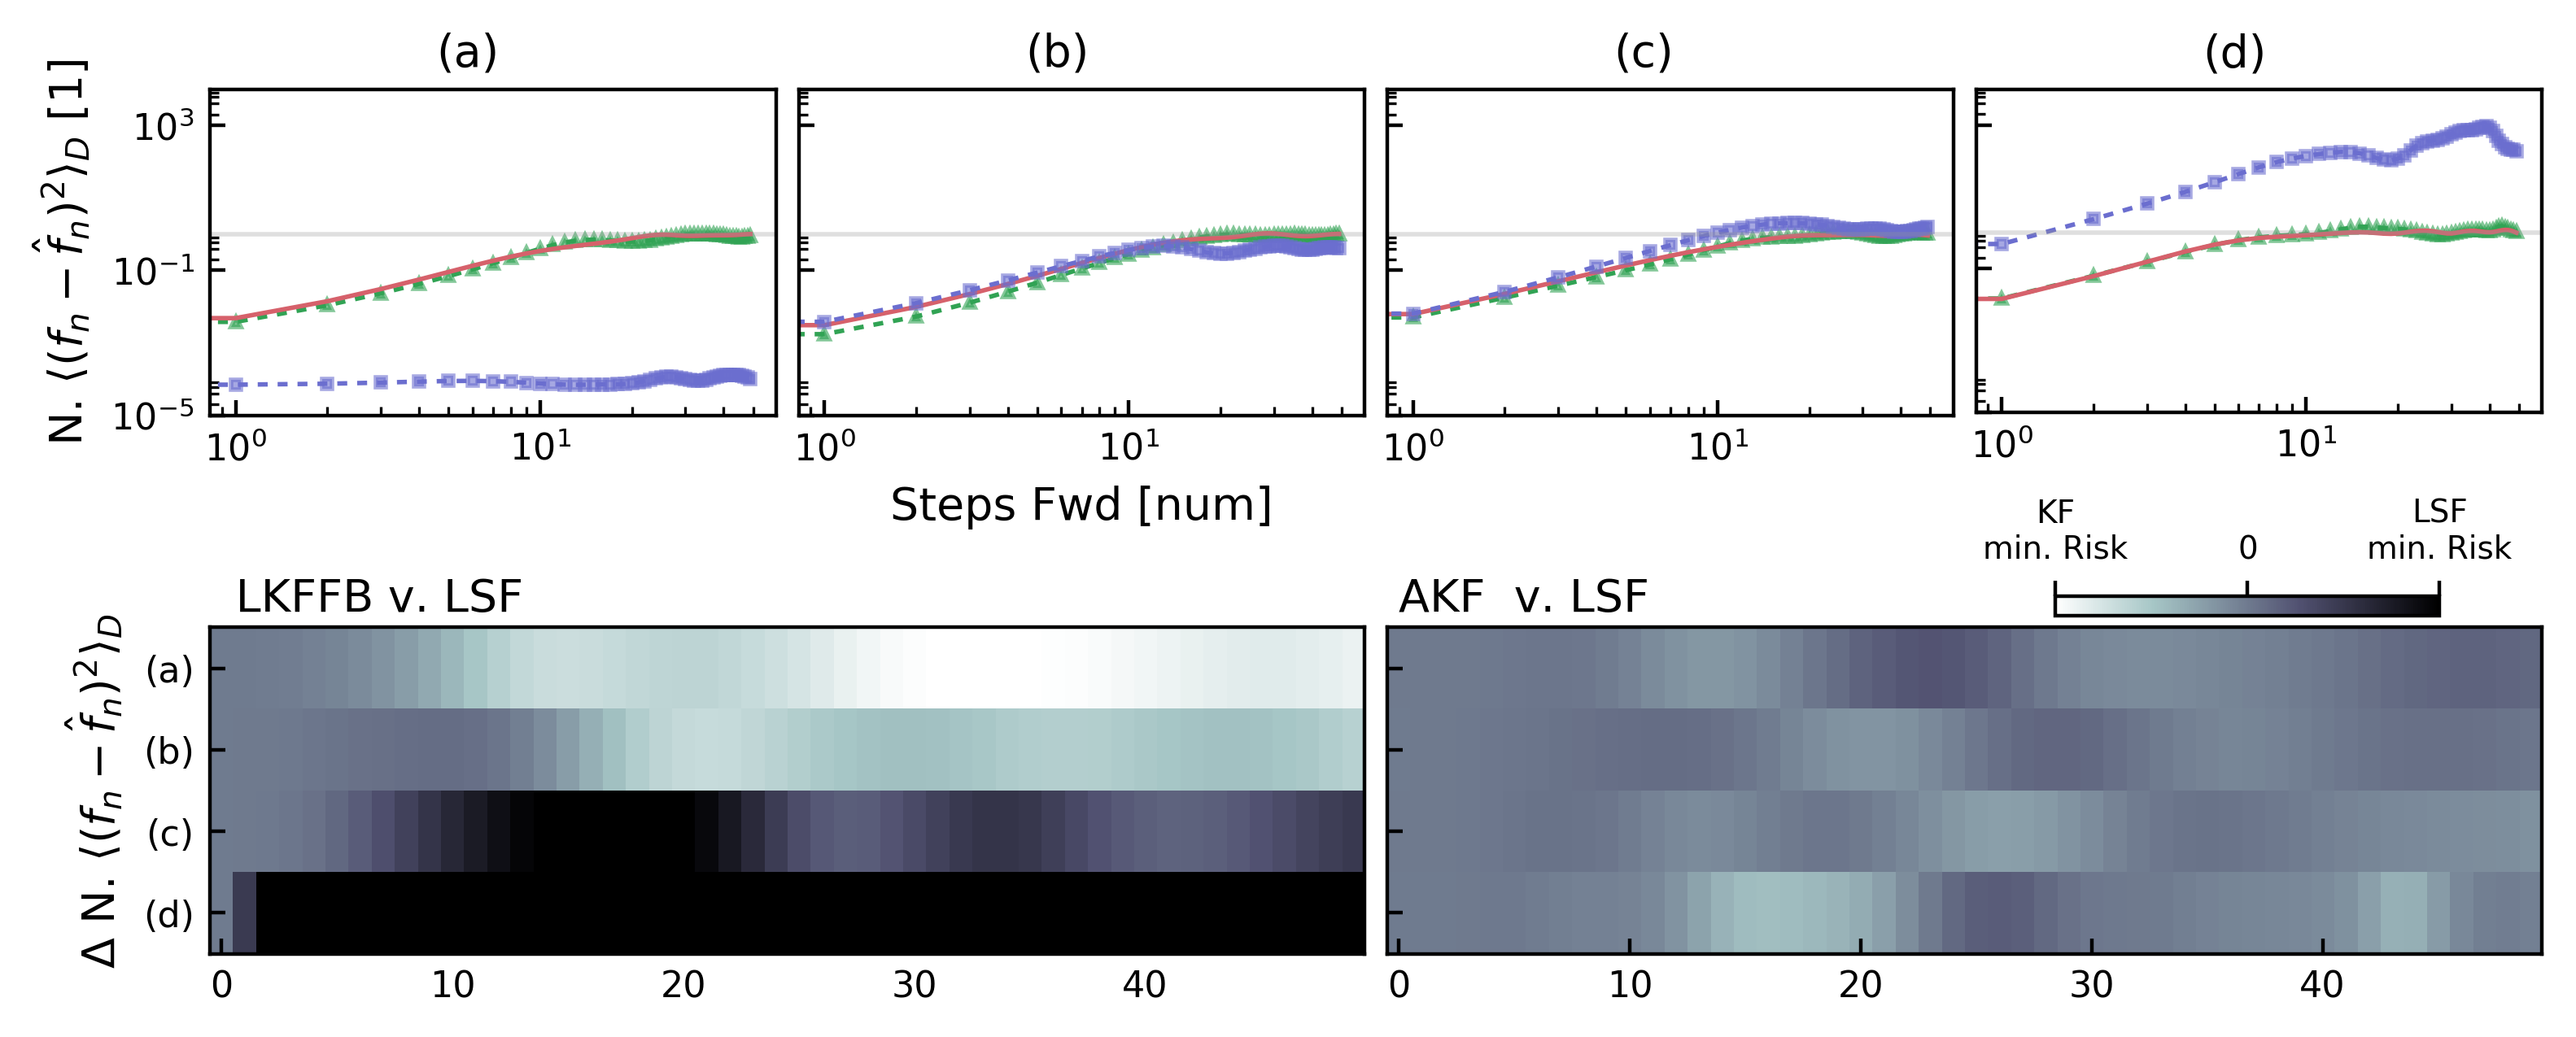

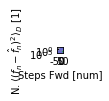

In [5]:
## Fig Setup
nrows = 2
ncols = 4


gs = gridspec.GridSpec(nrows, ncols,
                       left=0.08, right=0.99, 
                       top=0.9, bottom=0.15, 
                       wspace=0.04, hspace=0.65)

fig = plt.figure(figsize=(cm2inch(20.), cm2inch(9.)), dpi=my_dpi)
dumpfig = plt.figure(figsize=(0.1, 0.1))
dumpax = dumpfig.add_subplot(111)


LKFFB_ax = fig.add_subplot(gs[1, 0:2])
AKF_ax = fig.add_subplot(gs[1, 2:])

for kalmanX in ['LKFFB', 'AKF']:
    orig_cmap = matplotlib.cm.bone_r
    vars()[kalmanX+'_im'] = vars()[kalmanX+'_ax'].imshow(vars()[kalmanX+'_diff_matrx'], vmax=1, vmin=-1,
                                                         cmap=orig_cmap, aspect='auto')
            
    vars()[kalmanX+'_ax'].set_yticks([0, 1, 2, 3])
    vars()[kalmanX+'_ax'].tick_params(direction='in', axis='both')
    vars()[kalmanX+'_ax'].margins(0.2)
    vars()[kalmanX+'_ax'].set_xlim([-0.5, 49.5])
    vars()[kalmanX+'_ax'] = set_font_sizes(vars()[kalmanX+'_ax'], fsize, Fsize)
    

    
LKFFB_ax.set( ylabel = r'$\Delta$ N. $\langle (f_n -\hat{f}_n)^2\rangle_D$', yticklabels=case_labels)
AKF_ax.set(ylabel='', yticklabels=[])
LKFFB_ax.text(0.01, 1.05, r' LKFFB v. LSF', fontsize=Fsize, transform=LKFFB_ax.transAxes)
AKF_ax.text(0.01, 1.05, r'AKF  v. LSF', fontsize=Fsize, transform=AKF_ax.transAxes)


# Plot loss maps

for idx_c in xrange(len(test_case_list)):
    
    vars()['ax'+str(idx_c)+'_mean']  = fig.add_subplot(gs[0, idx_c])
    dumpax, vars()['ax'+str(idx_c)+'_mean'] = pnm(dumpax, vars()['ax'+str(idx_c)+'_mean'],  ['LSF', 'AKF', 'LKFFB'], 
                                           test_case_list[idx_c], variation_list[idx_c], 
                                           datapath, GPRP_load='No',
                                           fstep=50, sstep=50, lowloss=20, 
                                           ylim = [-5, 4], yscale='log')
    

    vars()['ax'+str(idx_c)+'_mean'].text(0.4, 1.07, case_labels[idx_c], transform=vars()['ax'+str(idx_c)+'_mean'].transAxes)
    if idx_c !=0:
        vars()['ax'+str(idx_c)+'_mean'].set(title='', ylabel='', yticklabels=[])
    if idx_c !=1:
        vars()['ax'+str(idx_c)+'_mean'].set(xlabel='')
        
    vars()['ax'+str(idx_c)+'_mean'] = set_font_sizes(vars()['ax'+str(idx_c)+'_mean'], fsize, Fsize)

# Make colorbar
cb = fig.colorbar(vars()[kalmanX+'_im'], orientation='horizontal', fraction=0.01, pad=0.0,
                  ticks=[-1, 0, 1])
cb.ax.set_xticklabels([r'KF'+"\n"+'min. Risk', r'$0$', r'LSF'+"\n"+'min. Risk'], fontsize=7)
cb.ax.set_position([0.8, 0.41, 0.15, 0.05])
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

fig.savefig(savefig+figname+'.svg', format='svg')
plt.show()
plt.close()

AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 15 12
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 23 11
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 21 5
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 22 3


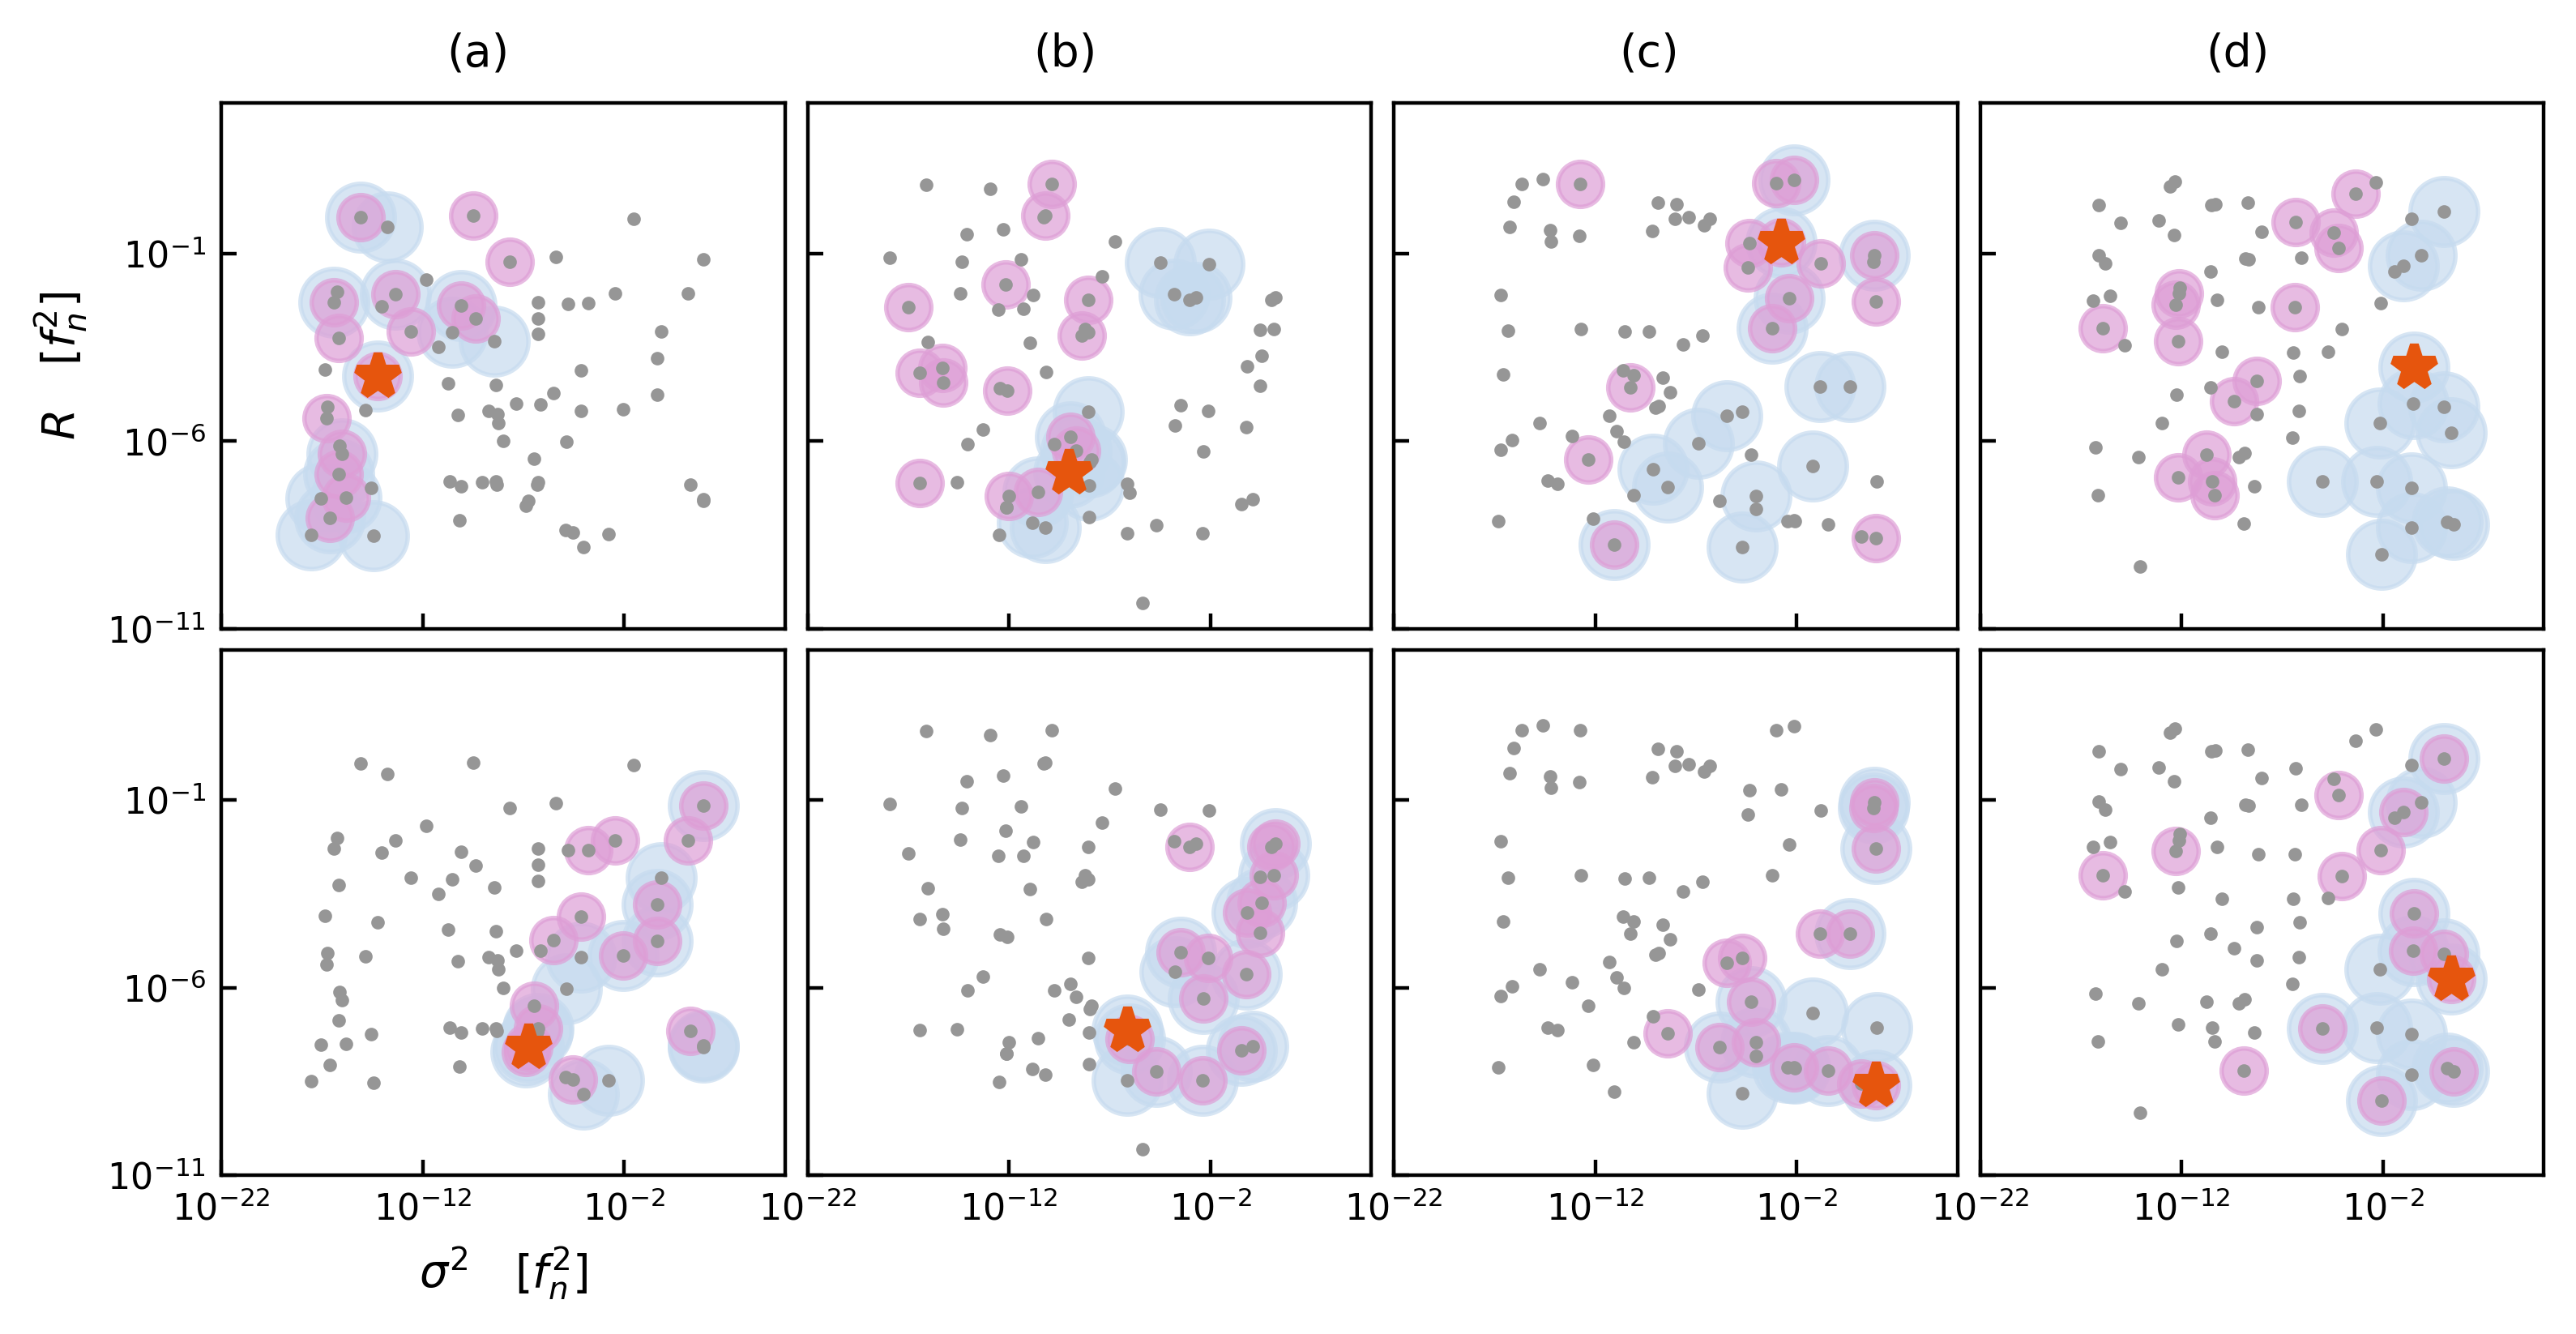

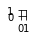

In [6]:
## Fig Setup
nrows = 2
ncols = 4
THRES=15
case_thres = ['10', '10', '10', '30']
case_thres_med_ratio_LKFFB = ['10', '10', '10', '30']
case_thres_med_ratio_AKF = ['10', '10', '10', '30']

gs = gridspec.GridSpec(nrows, ncols,
                       left=0.08, right=0.99, 
                       top=0.99, bottom=0.15, 
                       wspace=0.04, hspace=0.04)

fig = plt.figure(figsize=(cm2inch(20.), cm2inch(10.)), dpi=my_dpi)
dumpfig = plt.figure(figsize=(0.1, 0.1))
dumpax = dumpfig.add_subplot(111)

for idx_c in xrange(len(test_case_list)):
    
    vars()['ax'+str(idx_c)+'_1']  = fig.add_subplot(gs[0, idx_c])
    vars()['ax'+str(idx_c)+'_2']  = fig.add_subplot(gs[1, idx_c])
    
    vars()['ax'+str(idx_c)+'_1'], vars()['ax'+str(idx_c)+'_2'] = plot_risk_map_2(vars()['ax'+str(idx_c)+'_1'], ['LKFFB', 'AKF'], 
                      test_case_list[idx_c], variation_list[idx_c], datapath, lowloss=THRES,
                      figax2=vars()['ax'+str(idx_c)+'_2'], xlim=[-22, 6], ylim = [-11, 3])
    
    vars()['ax'+str(idx_c)+'_1'].text(0.4, 1.07, case_labels[idx_c], fontsize=Fsize, #+r': $L^*<$ %s'%(case_thres[idx_c]), 
                                      transform=vars()['ax'+str(idx_c)+'_1'].transAxes)
    if idx_c !=0:
        vars()['ax'+str(idx_c)+'_1'].set(title='', xlabel='', xticklabels=[], ylabel='', yticklabels=[])
        vars()['ax'+str(idx_c)+'_2'].set(title='', xlabel='', ylabel='', yticklabels=[])
    vars()['ax'+str(0)+'_1'].set(title='', xlabel='', xticklabels=[])
    vars()['ax'+str(0)+'_2'].set(title='', ylabel='')
    
    for ax in [vars()['ax'+str(idx_c)+'_1'], vars()['ax'+str(idx_c)+'_2']]:
        ax = set_font_sizes(ax, fsize, Fsize)
    
    
fig.savefig(savefig+figname+'_B.svg', format='svg')

plt.show()
plt.close()

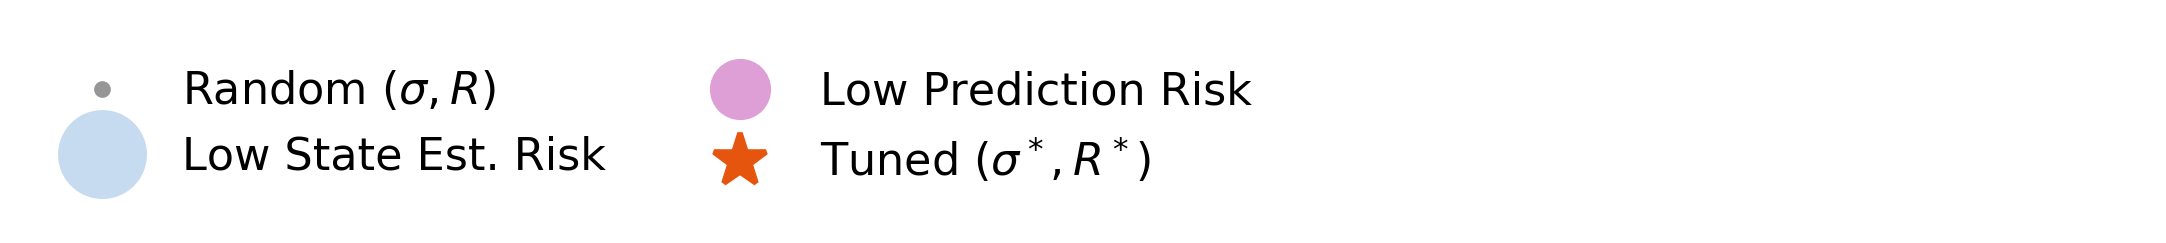

In [7]:
fig1 = plt.figure(figsize=(cm2inch(15),cm2inch(1.2)), dpi=my_dpi)

ax = fig1.add_subplot(111)
lgd=ax.legend(handles=RISK_H2,
       labels=RISK_L2,
       bbox_to_anchor=(-0.15, 0, 0.0,1.1), loc=2, ncol=2, frameon=True, fontsize=fsize, 
       facecolor='white', edgecolor='white')
ax.set_frame_on(False)
ax.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')

fig1.savefig(savefig+figname+'lgnd.svg', format='svg', dpi=my_dpi)
plt.show()
plt.close()

#### Document Thresholds ####

AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 15 12
TestCase: 15, Variation: 12, Algorithm: LKFFB. Total Loss Val / Loss Var = 0.57065651057 
TestCase: 15, Variation: 12, Algorithm: LKFFB. Max Loss Val / Loss Var = 1.31598310416 
TestCase: 15, Variation: 12, Algorithm: LKFFB. Median Loss Val / Loss Var = 0.688524573786 
TestCase: 15, Variation: 12, Algorithm: LKFFB. Threshold Loss Val / Median Loss = 0.828810666019 

TestCase: 15, Variation: 12, Algorithm: AKF. Total Loss Val / Loss Var = 1.28878647206 
TestCase: 15, Variation: 12, Algorithm: AKF. Max Loss Val / Loss Var = 1676.44189263 
TestCase: 15, Variation: 12, Algorithm: AKF. Median Loss Val / Loss Var = 930.265836125 
TestCase: 15, Variation: 12, Algorithm: AKF. Threshold Loss Val / Median Loss = 0.00138539589655 

AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 23 11
TestCase: 23, Variation: 11, Algorithm: LKFFB. Total Loss Val

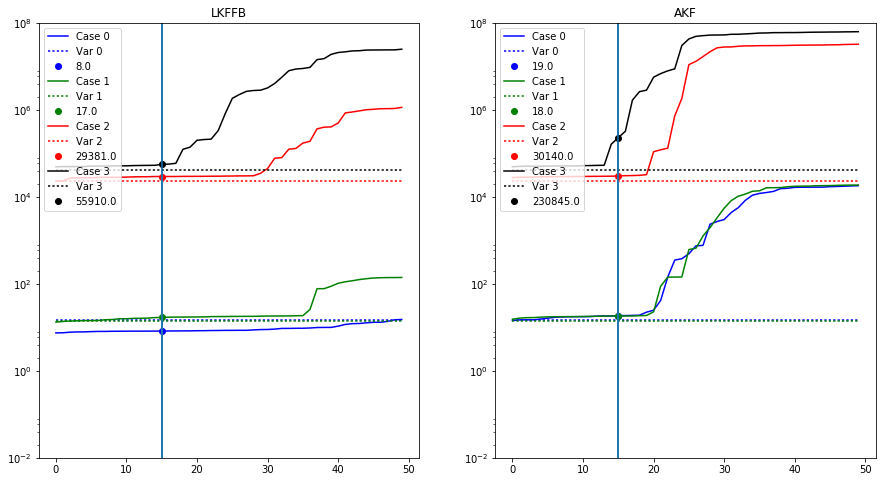

In [8]:
from data_tools.load_raw_cluster_data import LoadExperiment as le
from data_tools.data_risk_analysis import build_risk_dict, riskmapdata, norm_risk, analyse_kalman_errs
from data_tools.data_tuned_run_analysis import TUNED_RUNS_DICT
THRES = 50
Proposed= 15
clist = ['b', 'g', 'r', 'k']
ALGOLIST = ['LKFFB', 'AKF']
ALGOCUTOFF = {'LKFFB': Proposed, 'AKF':Proposed}
fig = plt.figure(figsize=(15, 8))
ax_L = fig.add_subplot(121)
ax_A = fig.add_subplot(122)
ax_list = [ax_L, ax_A]
alpha=1.0


for idx_c in xrange(len(test_case_list)):
    
    std_of_applied_noise =0.
    
    testobj = le(test_case_list[idx_c], variation_list[idx_c], 
                 AKF_path=datapath,
                 LKFFB_path=datapath,
                 LSF_path='', GPRP_path='',
                 GPRP_load='No', LSF_load='No', AKF_load='Yes', LKFFB_load='Yes')

    RISKDICT = build_risk_dict(testobj)
    
    std_of_applied_noise = testobj.LKFFB_msmt_noise_variance # incorrectly named variable. 
    
    loss_variance = (2.0*np.pi*std_of_applied_noise)**2 # don't know where the factor of two pi comes from. Guessed.
    
    for idx_algo in xrange(2):
        
        algotype = ALGOLIST[idx_algo]
        
        p_err, hyp, f_err = RISKDICT[algotype][0:3]

        s_traj, f_traj = riskmapdata(p_err, 
                                     f_err, 
                                     hyp, 
                                     maxforecaststps=50, 
                                     maxstateeststps=50)[6:8]

        total_loss = np.asarray([np.sum(x) for x in s_traj])
        
#         #rescale for Truth.alpha parameter:
#         alpha=1.0
#         if test_case_list[idx_c]==21 or test_case_list[idx_c]==22:
#             print('rescaled by alpha =1000 for test case: ', test_case_list[idx_c])
#             alpha = (1.0/1000)**2

        ax_list[idx_algo].plot(range(THRES), alpha*total_loss[0:THRES], '-', c=clist[idx_c], label='Case %s' %(idx_c) )
        ax_list[idx_algo].plot(range(THRES), alpha*loss_variance*np.ones(THRES), ':', c=clist[idx_c], label='Var %s' %(idx_c) )
        ax_list[idx_algo].set(title=algotype)
        ax_list[idx_algo].plot(ALGOCUTOFF[algotype],alpha*total_loss[ALGOCUTOFF[algotype]], 'o',c=clist[idx_c],
                               label=np.round(alpha*total_loss[ALGOCUTOFF[algotype]]))
        ax_list[idx_algo].axvline(x=Proposed)
        
        print "TestCase: %s, Variation: %s, Algorithm: %s. Total Loss Val / Loss Var = %s "%(test_case_list[idx_c], variation_list[idx_c], algotype, total_loss[ALGOCUTOFF[algotype]]/loss_variance)
        print "TestCase: %s, Variation: %s, Algorithm: %s. Max Loss Val / Loss Var = %s "%(test_case_list[idx_c], variation_list[idx_c], algotype, total_loss[-1]/loss_variance)
        print "TestCase: %s, Variation: %s, Algorithm: %s. Median Loss Val / Loss Var = %s "%(test_case_list[idx_c], variation_list[idx_c], algotype, np.median(total_loss)/loss_variance) 
        print "TestCase: %s, Variation: %s, Algorithm: %s. Threshold Loss Val / Median Loss = %s "%(test_case_list[idx_c], variation_list[idx_c], algotype, total_loss[ALGOCUTOFF[algotype]] / np.median(total_loss))
        print 
for ax in ax_list:
    ax.legend(loc=2)
    ax.set_yscale('log')
    ax.set_ylim([10**-2, 10**8])
    ax.set_xscale('linear')
plt.show()
plt.close()

In [9]:
threshold_A2C = 1.3*2.0*np.pi
threshold_D = 1.3*2.0*np.pi
max_A2C = 1.3 / 1650
max_A2D = 5.6 / 1800

print("Threshold for cases A to C (with 2pi factor) approx", threshold_A2C)
print("As a percentage of the max loss inccurred")

('Threshold for cases A to C (with 2pi factor) approx', 8.168140899333462)
As a percentage of the max loss inccurred


#### Other Plots ####

LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
I am in RISK DICT and test case and variations are: 15 12
Total coeff 22.3175419259 0.0089971871486
LKFFB
I am in RISK DICT and test case and variations are: 15 12


../../../../data_tools/data_tuned_run_analysis.py:275: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if (freq_basis_array == None) and (instantA == None):


LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
I am in RISK DICT and test case and variations are: 23 11
Total coeff 46.8295552628 0.0189548060807
LKFFB
I am in RISK DICT and test case and variations are: 23 11
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
I am in RISK DICT and test case and variations are: 21 5
Total coeff 206215.306295 0.046763155444
LKFFB
I am in RISK DICT and test case and variations are: 21 5
LSF: Data Loaded? Yes
AKF: Data Loaded? Yes
LKFFB: Data Loaded? Yes
LSF
AKF
I am in RISK DICT and test case and variations are: 22 3
Total coeff 58063.0663693 0.00740637001644
LKFFB
I am in RISK DICT and test case and variations are: 22 3


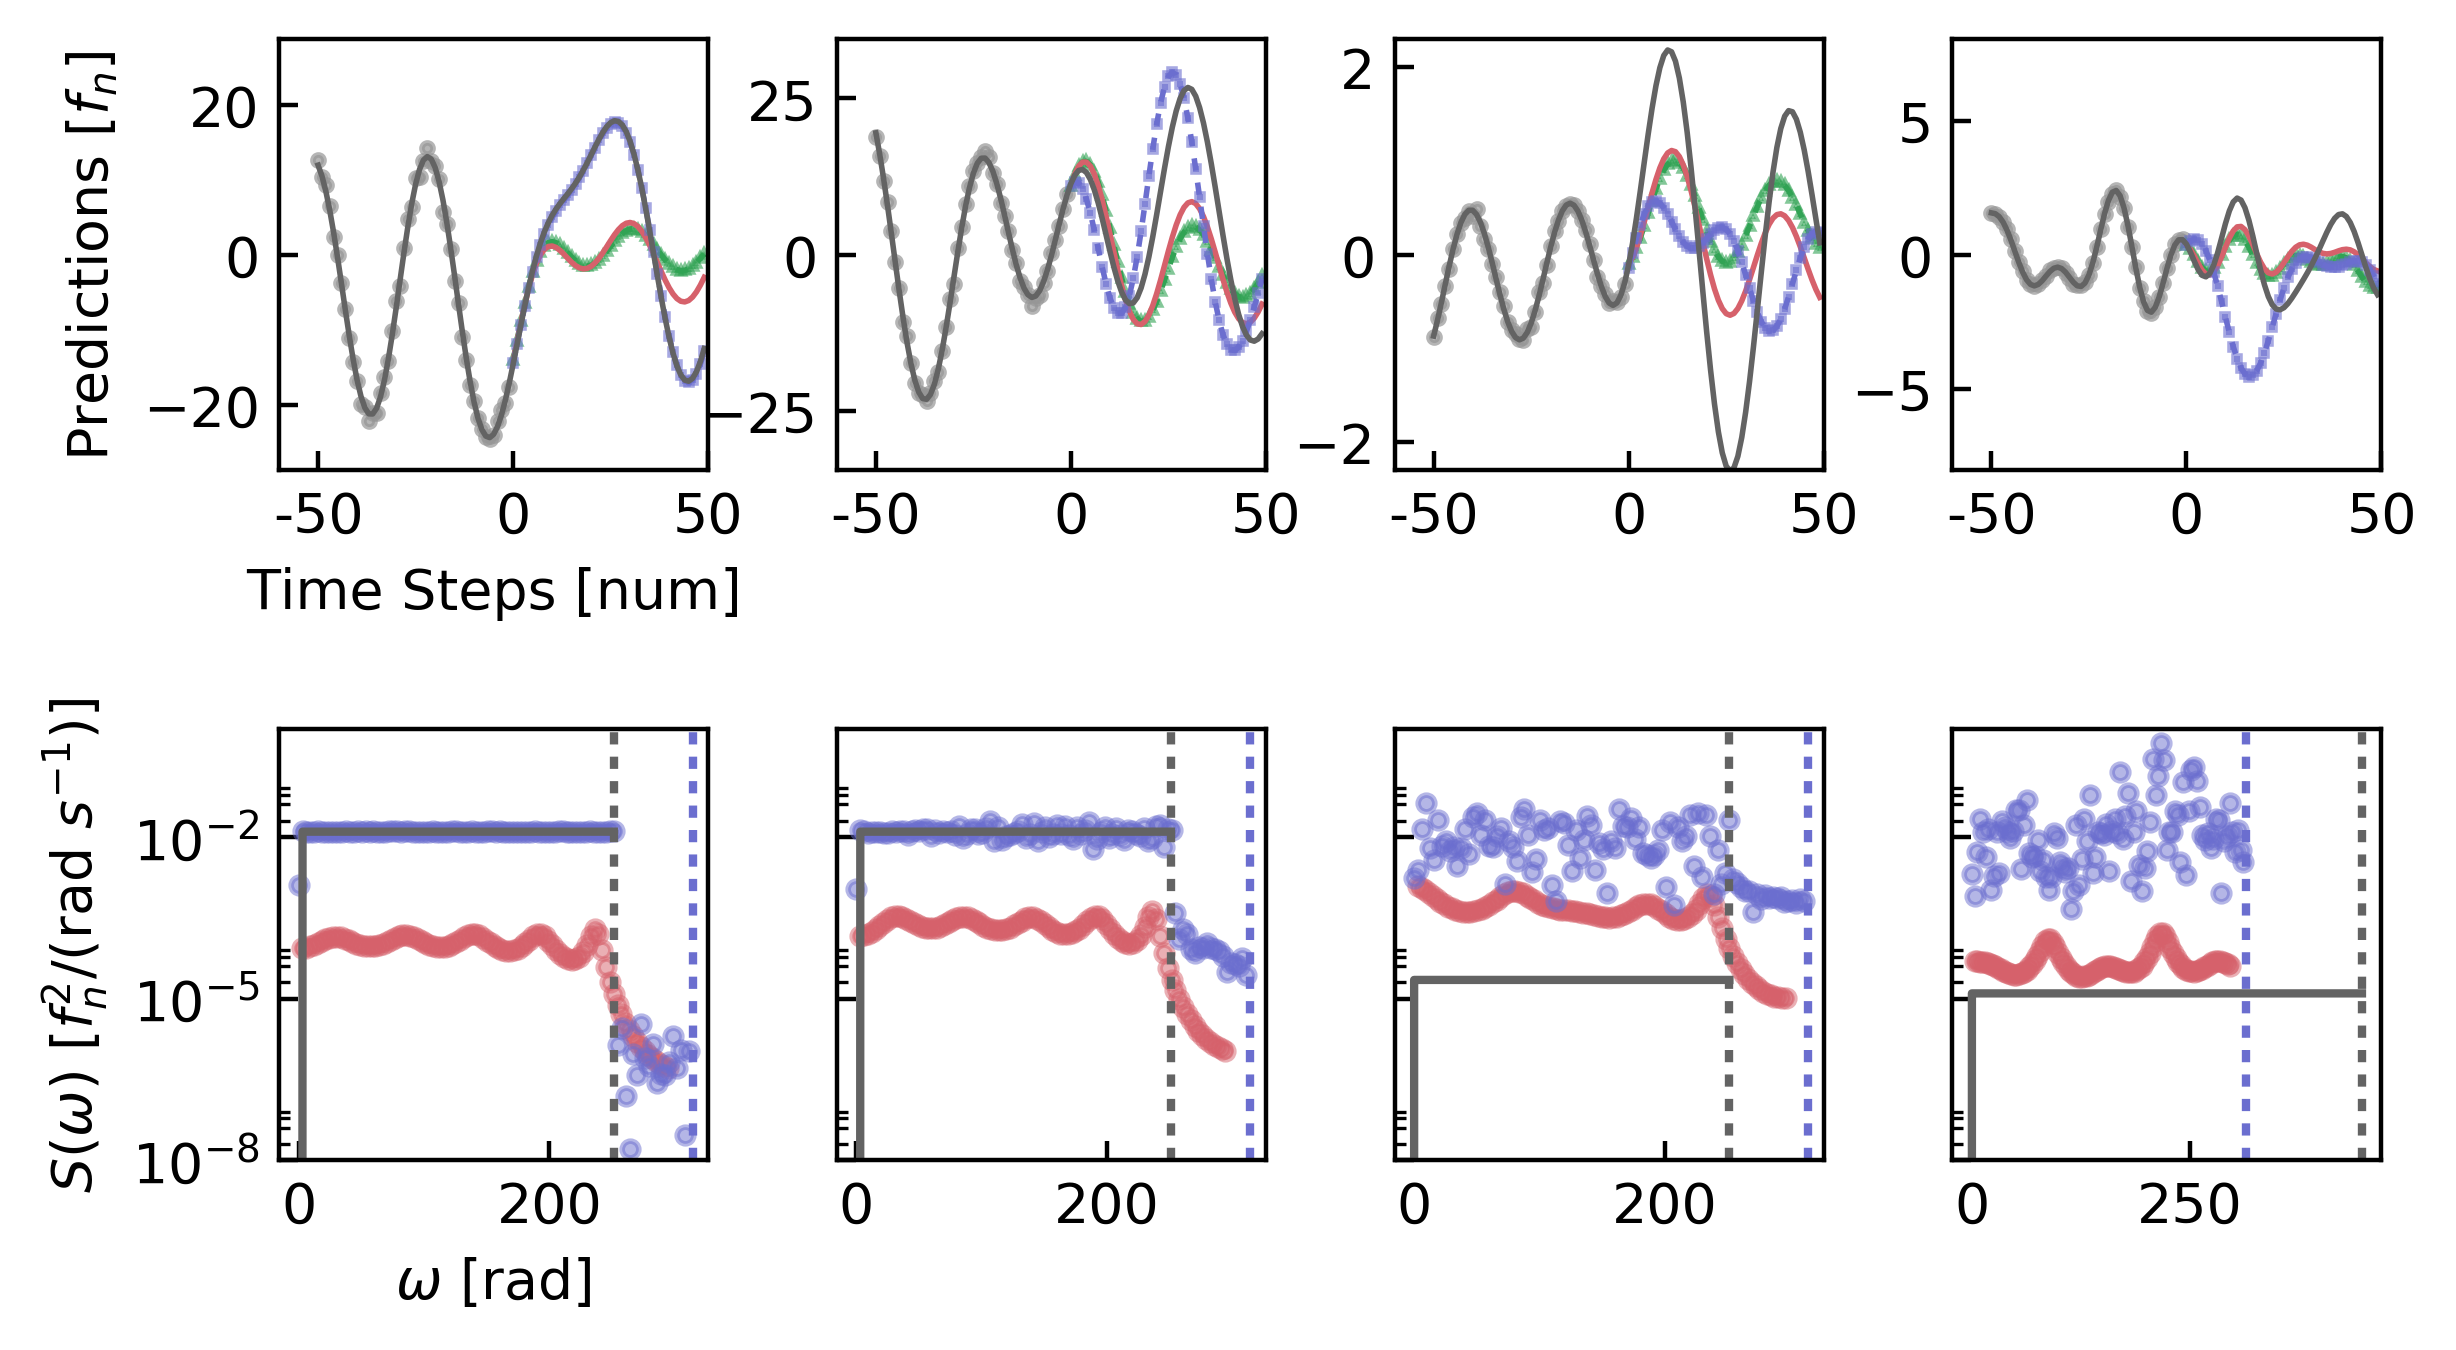

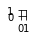

In [10]:
## Fig Setup
nrows = 2
ncols = 4


gs = gridspec.GridSpec(nrows, ncols,
                       left=0.1, right=0.99, 
                       top=0.99, bottom=0.1, 
                       wspace=0.3, hspace=0.6)

fig = plt.figure(figsize=(cm2inch(15.), cm2inch(8.)), dpi=my_dpi)
dumpfig = plt.figure(figsize=(0.1, 0.1))
dumpax = dumpfig.add_subplot(111)

for idx_c in xrange(len(test_case_list)):
    
    
    vars()['ax'+str(idx_c)+'_1']  = fig.add_subplot(gs[ 0,idx_c])
    vars()['ax'+str(idx_c)+'_3']  = fig.add_subplot(gs[ 1,idx_c])
    
    # Single Predictions
    
    vars()['ax'+str(idx_c)+'_1'], vars()['ax'+str(idx_c)+'_3'] = psp(vars()['ax'+str(idx_c)+'_1'], vars()['ax'+str(idx_c)+'_3'],  ['LSF', 'AKF', 'LKFFB'], 
                                           test_case_list[idx_c], variation_list[idx_c], 
                                           datapath, GPRP_load='No', ylim_amps = [-8, 0],
                                           fstep=50, sstep=50, lowloss=20)
    
    # Formatting
    vars()['ax'+str(idx_c)+'_2'].set_ylim([-0.2, 2.5])
    vars()['ax'+str(idx_c)+'_3'].legend_.remove()
    
    if idx_c !=0:
        vars()['ax'+str(idx_c)+'_1'].set(xlabel='', ylabel='', )
        vars()['ax'+str(idx_c)+'_3'].set(xlabel='', ylabel='', yticklabels=[])
    

plt.show()
plt.close()